# Exercise: Logistic Regression and neural networks

Last revised: 16-Oct-2019 by Christian Forssén [christian.forssen@chalmers.se]

### Import modules

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context("talk")

## Examples of classifier functions used in logistic regression and neural networks

The following code plots the sigmoid and the step function, two common classifier functions used in neural networks (and logistic regression).

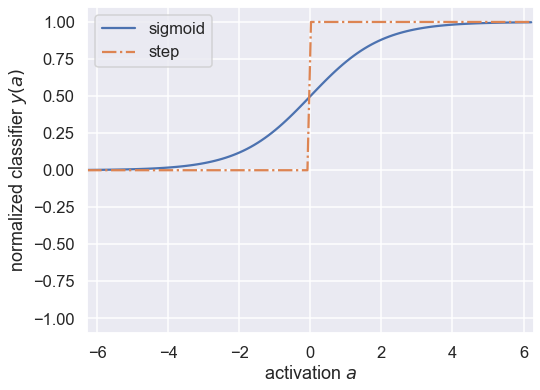

In [2]:
a = np.arange(-2*np.pi, 2*np.pi, .1)
sigma_fn = np.vectorize(lambda a: 1/(1+np.exp(-a)))
sigma = sigma_fn(a)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(a, sigma, label='sigmoid')

# Step Function
step_fn = np.vectorize(lambda a: 1.0 if a >= 0.0 else 0.0)
step = step_fn(a)
ax.plot(a, step, '-.', label='step')

ax.set_ylim([-1.1, 1.1])
ax.set_xlim([-2*np.pi,2*np.pi])
ax.set_ylabel('normalized classifier $y(a)$')
ax.set_xlabel(r'activation $a$')
ax.legend(loc='best');

#### Exercise
* Add the tanh function. 
* Add the ReLU, leaky ReLU, and ELU activation functions (find the functional forms online)

## A simple classification problem

`scikit-learn` includes various random [sample generators](https://scikit-learn.org/stable/datasets/index.html#generated-datasets) that can be used to build artificial datasets of controlled size and complexity.

For example, [`make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) generates two overlapping half cricles with optional Gaussian noise.

In [4]:
from sklearn import datasets, linear_model

### Logistic regression using `scikit-learn`

In [5]:
np.random.seed(0)
X, y = datasets.make_moons(200, noise=0.20)
clf = linear_model.LogisticRegressionCV(cv=5)
clf.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [7]:
# Helper functions to visualize the data and the decision boundary
#
def visualize(X, y, clf,ax=[]):
    plot_decision_boundary(lambda x: clf.predict(x), X, y, ax=ax)

def plot_decision_boundary(pred_func, X, y,ax=[]):
    # Set min and max values and give it some padding
    x0_min, x0_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x1_min, x1_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx0.ravel(), xx1.ravel()])
    Z = Z.reshape(xx0.shape)
    # Plot the contour and training examples
    if ax:
        ax.contourf(xx0, xx1, Z, cmap=plt.cm.RdBu, alpha=0.2)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
    else:
        plt.contourf(xx0, xx1, Z, cmap=plt.cm.RdBu, alpha=0.2)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)

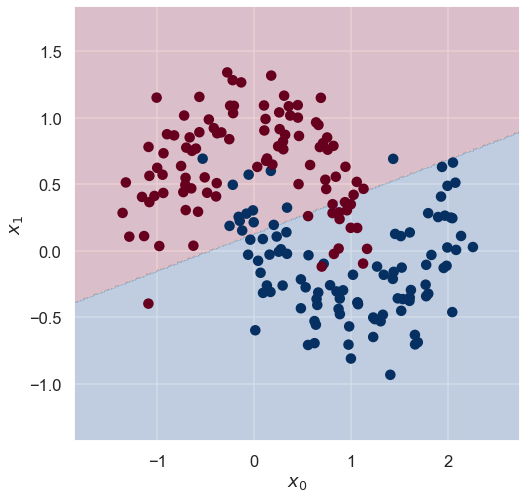

In [8]:
fig,ax = plt.subplots(figsize=(8,8))
visualize(X, y, clf,ax)
ax.set_xlabel(r'$x_0$')
ax.set_ylabel(r'$x_1$');

#### Sub-task
* Generate 200 new samples for use as test data.
* What is the accuracy of your binary classifier on
  * The training data
  * The test data?

### Exercise: Develop your own logistic regression binary classifier

Implement your own logistic regression binary classifier by modifying the function definitions below
1. Define the sigmoid activation function.
1. Define the feed-forward function that returns the output of the neuron given some input and weights.
1. Define the learning algorithm that:
   * use the cross entropy cost function defined in the lecture. Add an L2 regularizer with `alpha=0.1`
   * computes gradients of the cross entropy cost function (i.e. back propagation)
   * modifies the parameters with a learning rate parameter `eta = 0.01`.
   * returns the new weights.

Then:
1. Train the binary classifier on the data set. Perform rather many iterations.
1. Plot the decision boundary and compare with the `scikit-learn` implementation above.

In [12]:
def sigmoid(a):
    '''
    Sigmoid activation function
    
    Args:
        a (array[float]): activation signal
        
    Returns:
        y (float): the output of the neuron
    '''
    # Add code here (remove the dummy lines)
    y = None
    return y

def single_neuron(x, w):
    """
    Single neuron prediction. 
    
    Args:
        x (array[float]): input to the neuron
        w (array[float]):

    Returns:
        y (float): the output of the neuron
    """
    if len(np.array([x1[0],x2[1]]).shape)==1:
        x = np.append(1, x)
    else:
        m = len(x)
        x = np.c_[np.ones((m, 1)), x] 
    assert(len(w)==x.shape[-1])

    a = np.dot(x,w)
    return sigmoid(a)

def single_neuron_binary_classifier(x, t, iters=10000, alpha=0.1, eta0=0.01):
    """
    Makes predictions for a single neuron binary classifier
    
    Args:
        x (array[float]): an array of input data
        t (float): target output for each data points
        iters (int): number of iterations to apply gradient descent
        alpha (float): a rescaling parameter for the weights
        eta (float): learning rate
        
    Return
        w (array[float]): the trained weights of the classifier 
    """
    # Insert code here (remove the dummy lines)
    w = None
    return w

#### Sub-tasks and follow-up questions
* Plot the decision boundary $p(t=1|x_1,x_2,w_0^*, w_1^*) = 0.5$, where $w^*$ are the optimized weights. 
* Why does it correspond to a straight line?
* What is the accuracy for the training set?
* Create a test set. What is the accuracy on that?
* What would be needed to construct a better classifier that could handle the complicated class boundary?

### Exercise: Create a neural net binary classifier

Import and use tensorflow to create a (non-linear) binary classifier
1. Build a keras sequential model as in the `demo-NeuralNet.ipynb` example. A single hidden layer is sufficient.
1. Print a summary of your model. How many parameters does it have?
1. Train the binary classifier on the training data set. Try with different activation functions and different number of epochs of training.
1. Plot the decision boundary and compare with the Logistic Regression implementations above.
1. What is the accuracy on the test set?

In [18]:
# Install TensorFlow by updating the conda environment
# Download the latest version of the environment.yml file
# (with tensorflow on the last line)
# Then run:
# conda env update -f /path/to/environment.yml

import tensorflow as tf